# <font color=#B40404>--------------------- Results of the Cosinor analysis ---------------------</font>

# Table of Contents

* [Importation of the data considering p-values and q-values ](#importation_data)
* [Number of significative periodic models for a 0.05 threshold](#nb_rhythmic_proteins_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_pval)
    * [Considering q-values](#nb_rhythmic_proteins_qval)
* [Number of significative periodic models for a range of thresholds](#nb_rhythmic_proteins_range_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_range_threshold_pval)
    * [Considering q-values](#nb_rhythmic_proteins_range_threshold_qval)

In [15]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cbook import get_sample_data
import json
import pickle as pkl
import random
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # cosinorPy uses soon-to-be deprecated method pd.append...

# Importation of the data considering p-values and q-values <a class="anchor" id="importation_data"></a>

In [16]:
df_periodic_pval = pd.read_csv("data/Cosinor/cosinor_periodic_pval/cosinor_periodic_pval_concat_serie.csv")
df_periodic_qval = pd.read_csv("data/Cosinor/cosinor_periodic_qval/cosinor_periodic_qval_concat_serie.csv")

print(f"After the cosinor analysis, we obtain {len(df_periodic_pval)} significative models based on a p-value threshold")
print(f"After the cosinor analysis, we obtain {len(df_periodic_qval)} significative models based on a q-value threshold")


After the cosinor analysis, we obtain 179583 significative models based on a p-value threshold
After the cosinor analysis, we obtain 121344 significative models based on a q-value threshold


# Number of significative periodic models for a 0.05 threshold  <a class="anchor" id="nb_rhythmic_proteins_threshold"></a>

## Number of signifivative periodic models considering <font color=#B40404>p-values </font> <a class="anchor" id="nb_rhythmic_proteins_pval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.


In [17]:
Range_period = range(10,29)
rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])
dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_pval)):
        [name, cond] = df_periodic_pval['test'].iloc[i].split('/')
        if df_periodic_pval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_pval['period'].iloc[i])
        if df_periodic_pval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_pval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period.sort_values(by=['nb_prots_ctrl']))
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_pval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

   Period nb_prots_ctrl nb_prots_nlrp3
0      10          2457            672
1      11          2662            642
2      12          3786            790
3      13          5631            962
4      14          7108           1127
18     28          7815           3324
17     27          7864           3293
16     26          7922           3275
15     25          7983           3241
14     24          8081           3213
5      15          8091           1298
13     23          8164           3122
12     22          8266           3053
11     21          8375           2961
10     20          8494           2819
6      16          8580           1637
9      19          8595           2615
8      18          8652           2343
7      17          8686           1984


Histogram of the significative periodic models for the CTRL group and considering p-values

<Figure size 640x480 with 0 Axes>

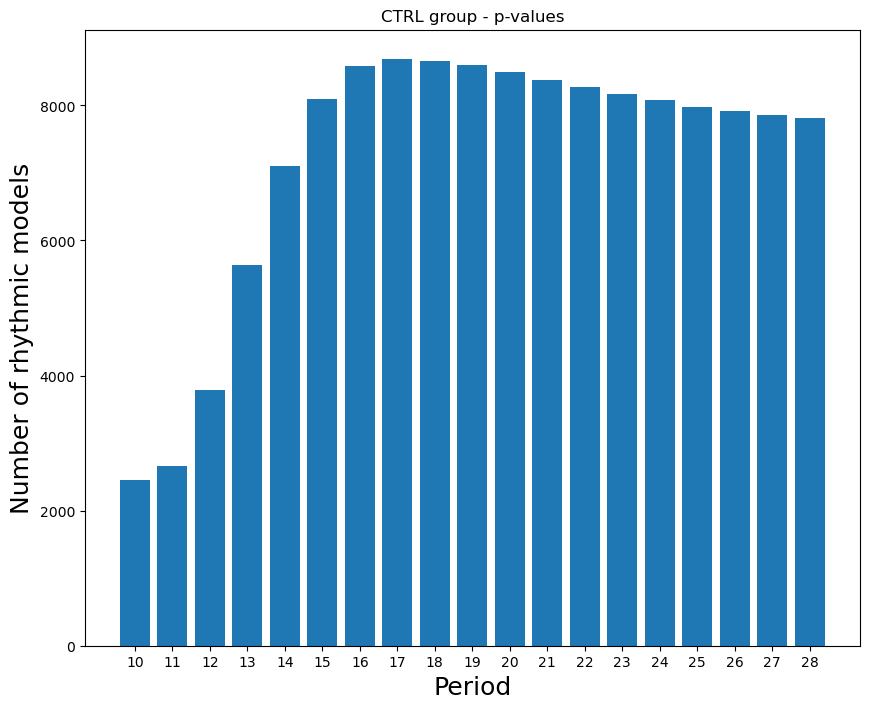

In [18]:
plt.figure(1)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_ctrl, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_ctrl_pval.png', dpi = 300)


Histogram of the significative periodic models for the NLRP3 group and considering p-values

<Figure size 640x480 with 0 Axes>

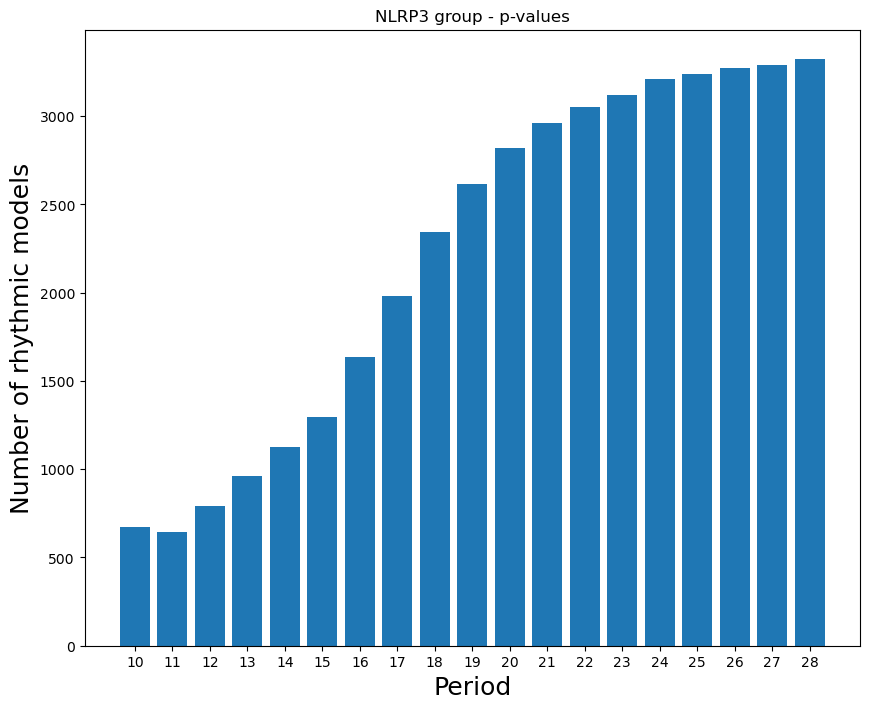

In [19]:
plt.figure(2)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_nlrp3, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_nlrp3_pval.png', dpi = 300)


## Number of significative periodic models considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_qval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.

In [20]:
Range_period = range(10,29)

rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])

dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_qval)):
        [name, cond] = df_periodic_qval['test'].iloc[i].split('/')
        if df_periodic_qval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_qval['period'].iloc[i])
        if df_periodic_qval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_qval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period.sort_values(by=['nb_prots_ctrl']))
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_qval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

   Period nb_prots_ctrl nb_prots_nlrp3
0      10           319             68
1      11           446            106
2      12          1206            238
3      13          2800            392
4      14          4200            552
5      15          5338            704
6      16          6058            896
18     28          6359           1758
17     27          6386           1761
16     26          6415           1762
15     25          6453           1761
7      17          6459           1152
14     24          6498           1763
13     23          6553           1766
12     22          6604           1746
8      18          6607           1368
9      19          6642           1532
11     21          6647           1716
10     20          6658           1655


Histogram of the significative periodic models for the CTRL group and considering q-values

<Figure size 640x480 with 0 Axes>

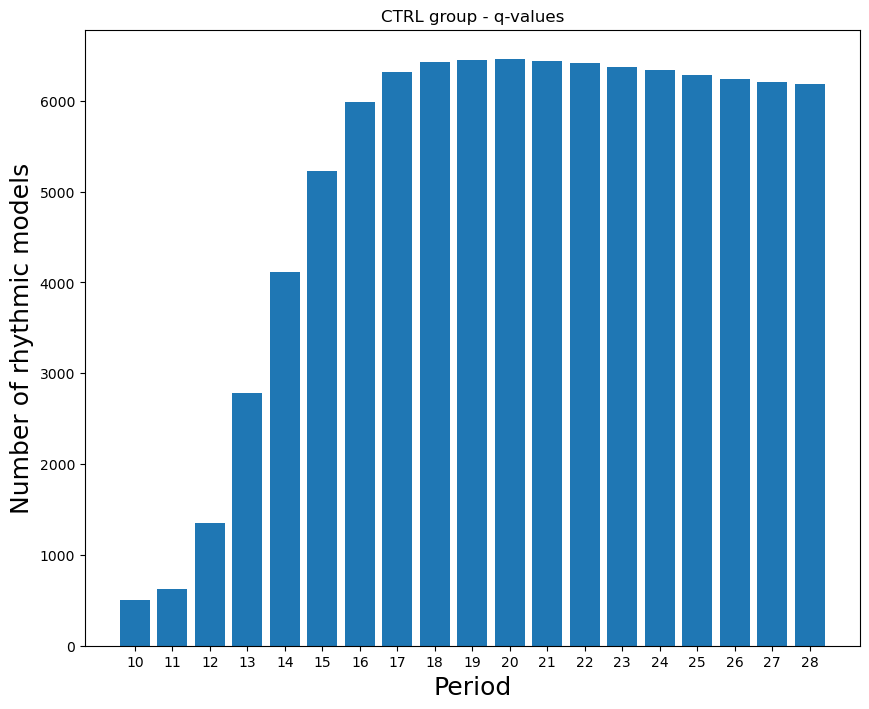

In [7]:
plt.figure(1)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_ctrl, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_ctrl_qval.png', dpi = 300)

Histogram of the significative periodic models for the NLRP3 group and considering q-values

<Figure size 640x480 with 0 Axes>

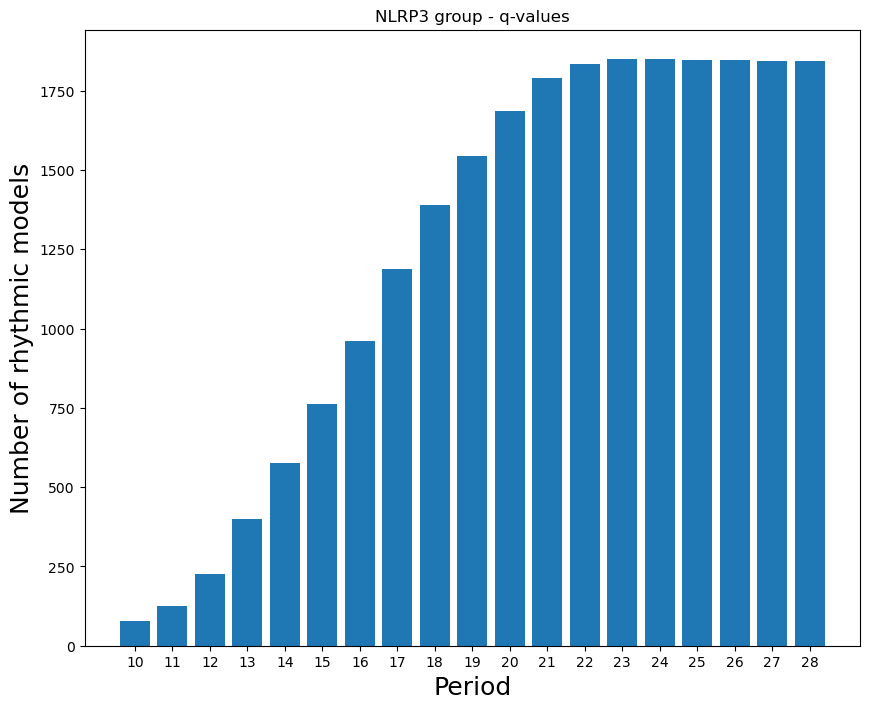

In [8]:
plt.figure(2)
figure(figsize=(10, 8))
labels, counts = np.unique(dataset_histo_nlrp3, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_nlrp3_qval.png', dpi = 300)


# Number of significative periodic models for a range of thresholds  <a class="anchor" id="nb_rhythmic_proteins_range_threshold"></a>

## Number of significative periodic models for a range of thresholds considering <font color=#B40404> p-values </font> <a class="anchor" id="nb_rhythmic_proteins_range_threshold_pval"></a>

### CTRL - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

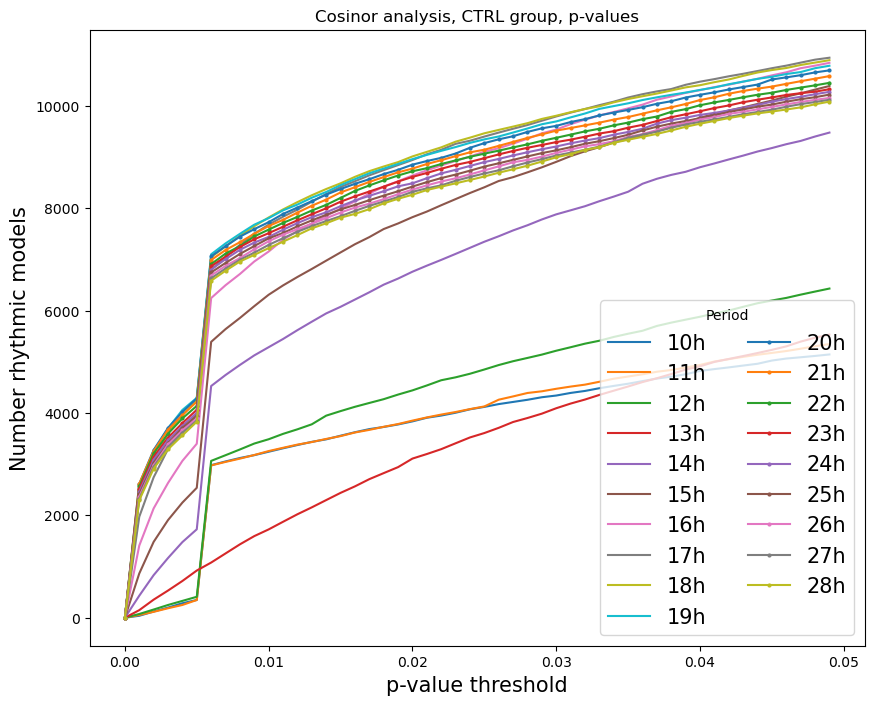

In [9]:
rhythm_prots_period_ctrl = {'pval':[],'nb_prots_ctrl_10':[],'nb_prots_ctrl_11':[],'nb_prots_ctrl_12':[],
                            'nb_prots_ctrl_13':[],'nb_prots_ctrl_14':[],'nb_prots_ctrl_15':[],'nb_prots_ctrl_16':[],
                            'nb_prots_ctrl_17':[],'nb_prots_ctrl_18':[],'nb_prots_ctrl_19':[],'nb_prots_ctrl_20':[],
                            'nb_prots_ctrl_21':[],'nb_prots_ctrl_22':[],'nb_prots_ctrl_23':[], 'nb_prots_ctrl_24':[],
                            'nb_prots_ctrl_25':[],'nb_prots_ctrl_26':[],'nb_prots_ctrl_27':[],'nb_prots_ctrl_28':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_ctrl['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_ctrl.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_pval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_ctrl[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_ctrl"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_ctrl['pval'], rhythm_prots_period_ctrl[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, CTRL group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_rna_seq_cosinor_ctrl_pval.png', dpi = 300)

### NLRP3 - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

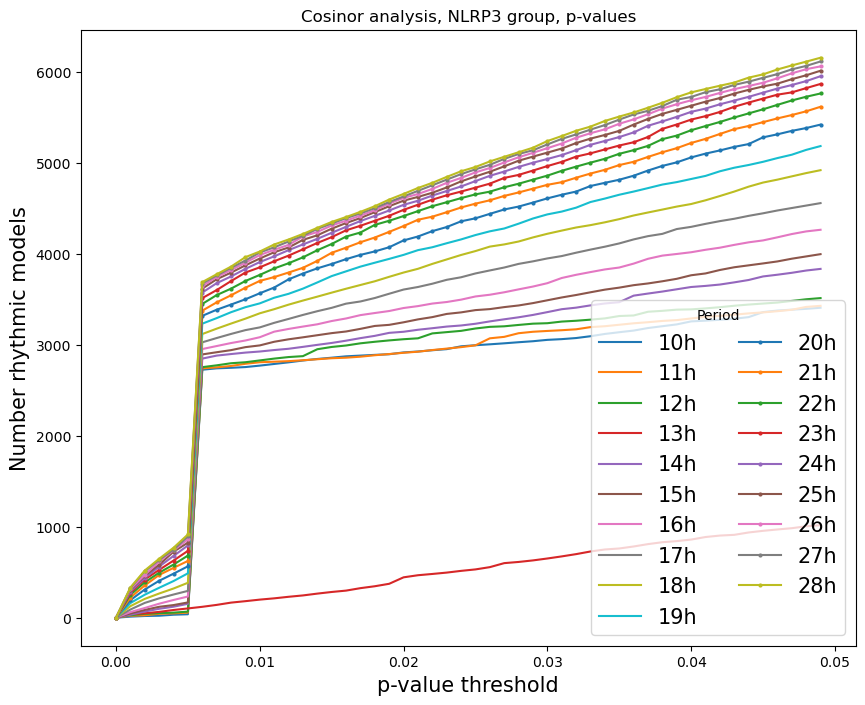

In [10]:
rhythm_prots_period_nlrp3 = {'pval':[],'nb_prots_nlrp3_10':[],'nb_prots_nlrp3_11':[],'nb_prots_nlrp3_12':[],
                            'nb_prots_nlrp3_13':[],'nb_prots_nlrp3_14':[],'nb_prots_nlrp3_15':[],'nb_prots_nlrp3_16':[],
                            'nb_prots_nlrp3_17':[],'nb_prots_nlrp3_18':[],'nb_prots_nlrp3_19':[],'nb_prots_nlrp3_20':[],
                            'nb_prots_nlrp3_21':[],'nb_prots_nlrp3_22':[],'nb_prots_nlrp3_23':[], 'nb_prots_nlrp3_24':[],
                            'nb_prots_nlrp3_25':[],'nb_prots_nlrp3_26':[],'nb_prots_nlrp3_27':[],'nb_prots_nlrp3_28':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_nlrp3['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_nlrp3.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_pval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_nlrp3[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_nlrp3"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)),cols, Range_period) :
    plt.plot(rhythm_prots_period_nlrp3['pval'], rhythm_prots_period_nlrp3[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, NLRP3 group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_rna_seq_cosinor_nlrp3_pval.png', dpi = 300)


### BOTH - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

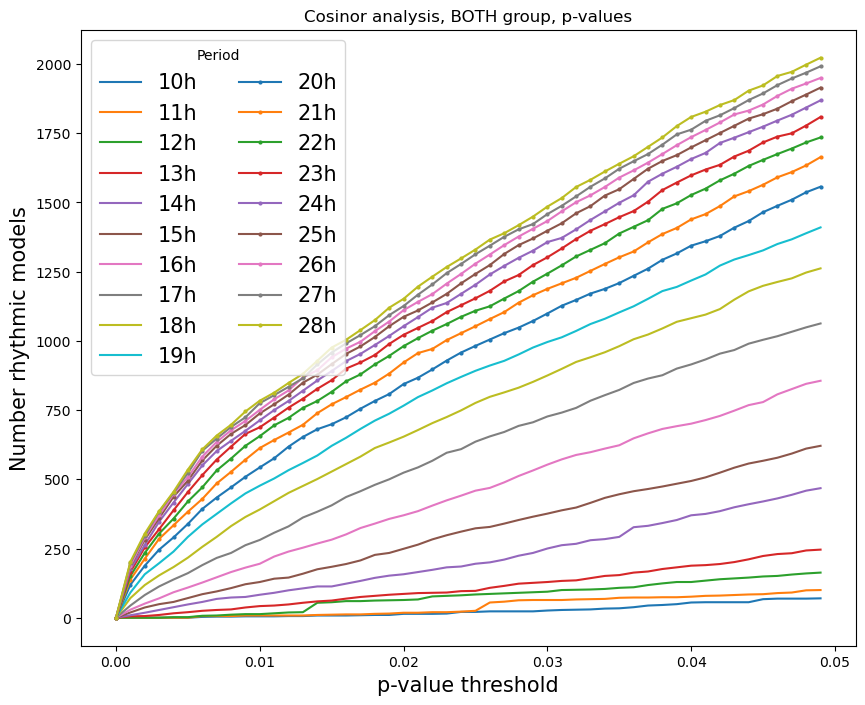

In [11]:
rhythm_prots_period_both = {'pval':[],'nb_prots_both_10':[],'nb_prots_both_11':[],'nb_prots_both_12':[],
                            'nb_prots_both_13':[],'nb_prots_both_14':[],'nb_prots_both_15':[],'nb_prots_both_16':[],
                            'nb_prots_both_17':[],'nb_prots_both_18':[],'nb_prots_both_19':[],'nb_prots_both_20':[],
                            'nb_prots_both_21':[],'nb_prots_both_22':[],'nb_prots_both_23':[], 'nb_prots_both_24':[],
                            'nb_prots_both_25':[],'nb_prots_both_26':[],'nb_prots_both_27':[],'nb_prots_both_28':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_both['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_both.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_pval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_both[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_both"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_both['pval'], rhythm_prots_period_both[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, BOTH group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_rna_seq_cosinor_both_pval.png', dpi = 300)


## Number of significative periodic models for a range of thresholds considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_range_threshold_qval"></a>

### CTRL - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

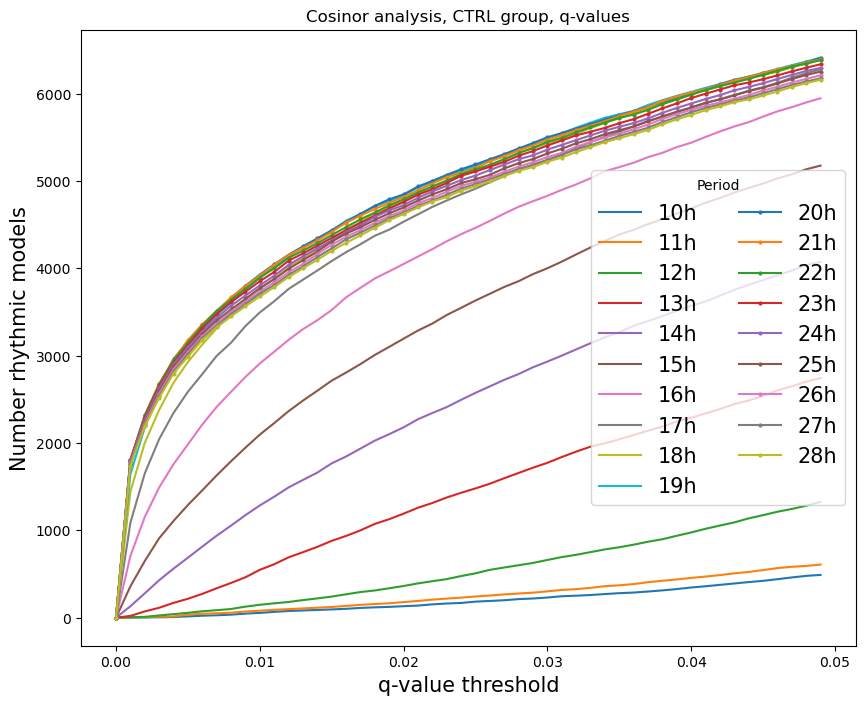

In [12]:
rhythm_prots_period_ctrl = {'qval':[],'nb_prots_ctrl_10':[],'nb_prots_ctrl_11':[],'nb_prots_ctrl_12':[],
                            'nb_prots_ctrl_13':[],'nb_prots_ctrl_14':[],'nb_prots_ctrl_15':[],'nb_prots_ctrl_16':[],
                            'nb_prots_ctrl_17':[],'nb_prots_ctrl_18':[],'nb_prots_ctrl_19':[],'nb_prots_ctrl_20':[],
                            'nb_prots_ctrl_21':[],'nb_prots_ctrl_22':[],'nb_prots_ctrl_23':[], 'nb_prots_ctrl_24':[],
                            'nb_prots_ctrl_25':[],'nb_prots_ctrl_26':[],'nb_prots_ctrl_27':[],'nb_prots_ctrl_28':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_ctrl['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_ctrl.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_qval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_ctrl[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_ctrl"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_ctrl['qval'], rhythm_prots_period_ctrl[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, CTRL group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_rna_seq_cosinor_ctrl_qval.png', dpi = 300)

### NLRP3 - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

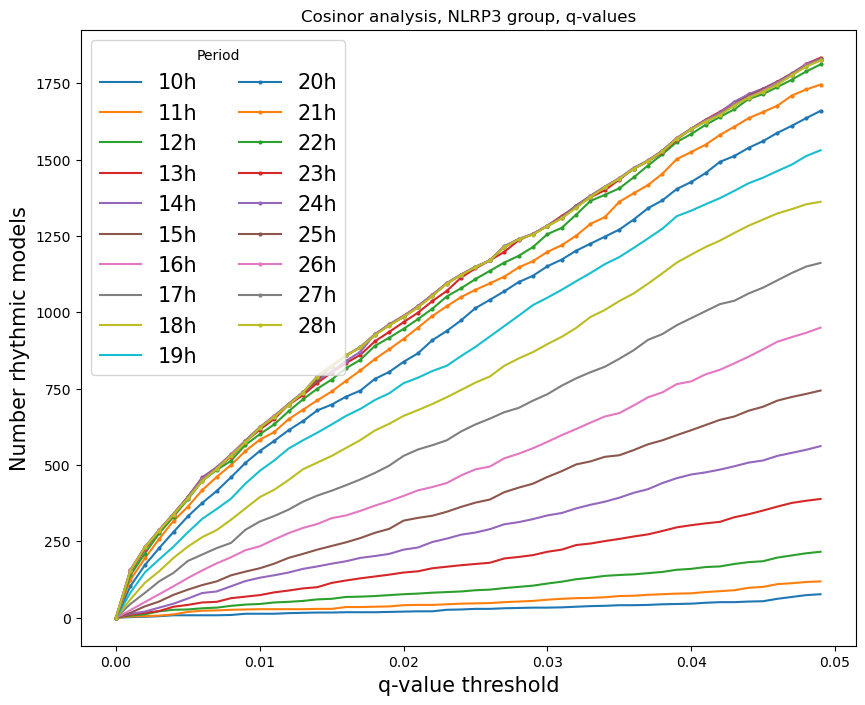

In [13]:
rhythm_prots_period_nlrp3 = {'qval':[],'nb_prots_nlrp3_10':[],'nb_prots_nlrp3_11':[],'nb_prots_nlrp3_12':[],
                            'nb_prots_nlrp3_13':[],'nb_prots_nlrp3_14':[],'nb_prots_nlrp3_15':[],'nb_prots_nlrp3_16':[],
                            'nb_prots_nlrp3_17':[],'nb_prots_nlrp3_18':[],'nb_prots_nlrp3_19':[],'nb_prots_nlrp3_20':[],
                            'nb_prots_nlrp3_21':[],'nb_prots_nlrp3_22':[],'nb_prots_nlrp3_23':[], 'nb_prots_nlrp3_24':[],
                            'nb_prots_nlrp3_25':[],'nb_prots_nlrp3_26':[],'nb_prots_nlrp3_27':[],'nb_prots_nlrp3_28':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_nlrp3['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_nlrp3.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_qval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_nlrp3[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_nlrp3"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_nlrp3['qval'], rhythm_prots_period_nlrp3[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, NLRP3 group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_rna_seq_cosinor_nlrp3_qval.png', dpi = 300)


### BOTH - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

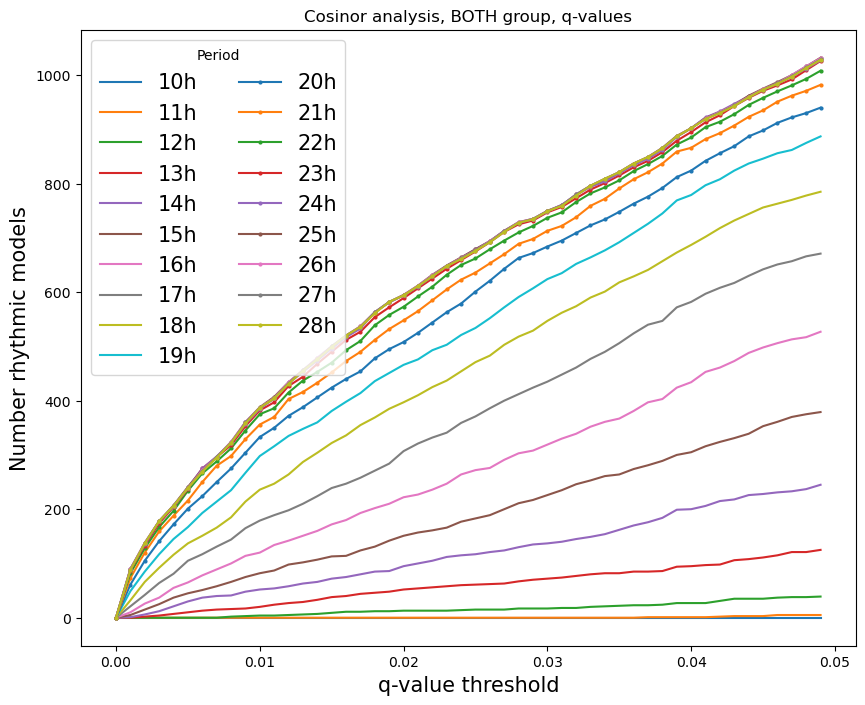

In [14]:
rhythm_prots_period_both = {'qval':[],'nb_prots_both_10':[],'nb_prots_both_11':[],'nb_prots_both_12':[],
                            'nb_prots_both_13':[],'nb_prots_both_14':[],'nb_prots_both_15':[],'nb_prots_both_16':[],
                            'nb_prots_both_17':[],'nb_prots_both_18':[],'nb_prots_both_19':[],'nb_prots_both_20':[],
                            'nb_prots_both_21':[],'nb_prots_both_22':[],'nb_prots_both_23':[], 'nb_prots_both_24':[],
                            'nb_prots_both_25':[],'nb_prots_both_26':[],'nb_prots_both_27':[],'nb_prots_both_28':[]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_both['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_both.keys()) 
del cols[0]

Range_period = range(10,29)
for column, period in zip(cols, Range_period) :
    pathway = "data/Cosinor/rhythm_prots_period_"+str(period)+"_qval.csv"
    rhythm_prots_period = pd.read_csv(pathway)
    rhythm_prots_period_both[column] = np.array(rhythm_prots_period.loc[:,"nb_prots_both"])


plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_both['qval'], rhythm_prots_period_both[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, BOTH group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_rna_seq_cosinor_both_qval.png', dpi = 300)
